# Modeling
In this notebook, we'll be modeling the data we've previously prepared. Out notebook will be laid out as follows:

1. Model Selection & Generation
2. Hyperparameter Optimization
3. Fine-Tuning (if needed)
4. Reporting Best Model(s) + Settings
5. Interpretation
6. Conclusion

Our eventual goal here is two-fold:

1. Accurately [and fairly] model the diabetes dataset
2. Interpret the results to find something worth recommending to those wanting to reduce risk of diabetes. This can be via LIME/SHAP (i.e. some interpretable model that approximates the neural network) or via analyzing a more simple model's structure (i.e. regression coefficients, random forest decision boundaries)

In [2]:
# Environment Setup
from utils.model import *
from utils.dataset import *

***
## Model Selection & Generation

<Train-Test Split Report>
Train: 202944 obs, 170962 no diabetes [0], 3705 pre-diabetes [1], 28277 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]
<Train-Test Split Report>
Train: 202944 obs, 170962 no diabetes [0], 3705 pre-diabetes [1], 28277 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]
<Train-Test Split Report>
Train: 202944 obs, 170962 no diabetes [0], 3705 pre-diabetes [1], 28277 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]


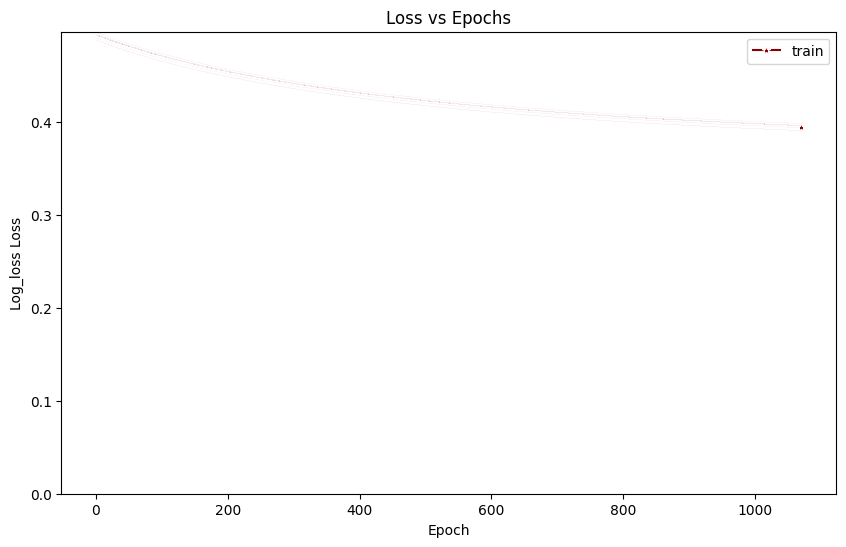

/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



<Test Report>
Precision: [no diabetes] 0.8423802669716268, [pre-diabetes] 0.05263157894736842, [diabetes] 0.0
Recall: [no diabetes] 0.9995788587070963, [pre-diabetes] 0.00014146272457207527, [diabetes] 0.0
F1-Score: [no diabetes] 0.9142716514370092, [pre-diabetes] 0.0002821670428893905, [diabetes] 0.0
Support: [no diabetes] 42741, [pre-diabetes] 7069, [diabetes] 926
Accuracy: 84.2085%
Macro-F1: 0.3049


100%|██████████| 6342/6342 [00:09<00:00, 651.63it/s]


Epoch 1/50, Loss: 0.4123, Test Loss: 0.5673


100%|██████████| 6342/6342 [00:09<00:00, 658.18it/s]


Epoch 2/50, Loss: 0.4023, Test Loss: 0.5548


100%|██████████| 6342/6342 [00:09<00:00, 662.61it/s]


Epoch 3/50, Loss: 0.4005, Test Loss: 0.5800


100%|██████████| 6342/6342 [00:09<00:00, 659.01it/s]


Epoch 4/50, Loss: 0.3995, Test Loss: 0.5657


100%|██████████| 6342/6342 [00:09<00:00, 668.99it/s]


Epoch 5/50, Loss: 0.3985, Test Loss: 0.5768


100%|██████████| 6342/6342 [00:09<00:00, 664.92it/s]


Epoch 6/50, Loss: 0.3983, Test Loss: 0.5636


100%|██████████| 6342/6342 [00:09<00:00, 664.33it/s]


Epoch 7/50, Loss: 0.3972, Test Loss: 0.5684


100%|██████████| 6342/6342 [00:09<00:00, 664.91it/s]


Epoch 8/50, Loss: 0.3975, Test Loss: 0.5653


100%|██████████| 6342/6342 [00:09<00:00, 676.32it/s]


Epoch 9/50, Loss: 0.3970, Test Loss: 0.5509


100%|██████████| 6342/6342 [00:09<00:00, 657.72it/s]


Epoch 10/50, Loss: 0.3966, Test Loss: 0.5536


100%|██████████| 6342/6342 [00:09<00:00, 693.26it/s]


Epoch 11/50, Loss: 0.3964, Test Loss: 0.5617


100%|██████████| 6342/6342 [00:09<00:00, 662.41it/s]


Epoch 12/50, Loss: 0.3963, Test Loss: 0.5643


100%|██████████| 6342/6342 [00:09<00:00, 663.68it/s]


Epoch 13/50, Loss: 0.3957, Test Loss: 0.5575


100%|██████████| 6342/6342 [00:09<00:00, 661.79it/s]


Epoch 14/50, Loss: 0.3955, Test Loss: 0.5587


100%|██████████| 6342/6342 [00:09<00:00, 662.41it/s]


Epoch 15/50, Loss: 0.3954, Test Loss: 0.5712


100%|██████████| 6342/6342 [00:09<00:00, 668.94it/s]


Epoch 16/50, Loss: 0.3953, Test Loss: 0.5680


100%|██████████| 6342/6342 [00:09<00:00, 676.19it/s]


Epoch 17/50, Loss: 0.3953, Test Loss: 0.5517


100%|██████████| 6342/6342 [00:09<00:00, 671.07it/s]


Epoch 18/50, Loss: 0.3947, Test Loss: 0.5632


100%|██████████| 6342/6342 [00:09<00:00, 663.99it/s]


Epoch 19/50, Loss: 0.3950, Test Loss: 0.5789


100%|██████████| 6342/6342 [00:09<00:00, 661.46it/s]


Epoch 20/50, Loss: 0.3945, Test Loss: 0.5641


100%|██████████| 6342/6342 [00:09<00:00, 664.87it/s]


Epoch 21/50, Loss: 0.3944, Test Loss: 0.5709


100%|██████████| 6342/6342 [00:09<00:00, 661.96it/s]


Epoch 22/50, Loss: 0.3941, Test Loss: 0.5598


100%|██████████| 6342/6342 [00:09<00:00, 662.11it/s]


Epoch 23/50, Loss: 0.3941, Test Loss: 0.5595


100%|██████████| 6342/6342 [00:09<00:00, 663.19it/s]


Epoch 24/50, Loss: 0.3943, Test Loss: 0.5829


100%|██████████| 6342/6342 [00:09<00:00, 668.04it/s]


Epoch 25/50, Loss: 0.3939, Test Loss: 0.5735


100%|██████████| 6342/6342 [00:09<00:00, 698.23it/s]


Epoch 26/50, Loss: 0.3938, Test Loss: 0.5657


100%|██████████| 6342/6342 [00:09<00:00, 662.95it/s]


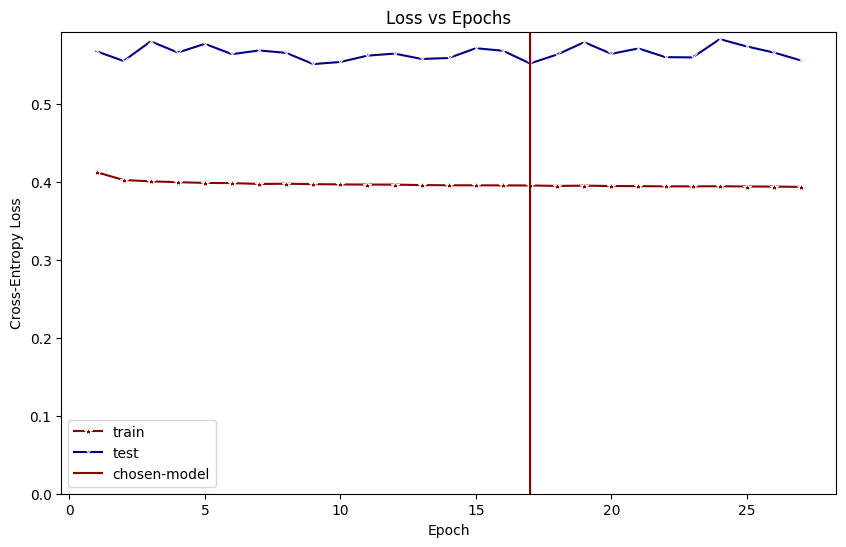

/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



<Test Report>
Precision: [no diabetes] 0.8423710425091232, [pre-diabetes] 0.0, [diabetes] 0.0975609756097561
Recall: [no diabetes] 0.9991343206756979, [pre-diabetes] 0.0, [diabetes] 0.0005658508982883011
F1-Score: [no diabetes] 0.9140802260370735, [pre-diabetes] 0.0, [diabetes] 0.0011251758087201125
Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
Accuracy: 84.1769%
Macro-F1: 0.3051

<Test Report>
Precision: [no diabetes] 0.8421959138422553, [pre-diabetes] 0.08928571428571429, [diabetes] 0.0
Recall: [no diabetes] 0.9953206523010693, [pre-diabetes] 0.0028292544914415053, [diabetes] 0.0
F1-Score: [no diabetes] 0.9123781540540251, [pre-diabetes] 0.005484711367064308, [diabetes] 0.0
Support: [no diabetes] 42741, [pre-diabetes] 7069, [diabetes] 926
Accuracy: 83.8872%
Macro-F1: 0.3060


/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
# generate lookup for models
models = {
    "tree": TreeClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet"),
    "ffnn": MLPClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet"),
    "log": LogClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet")
}

# manual search
models["tree"].set_hyperparams({
    "loss": "log_loss",
    "learning_rate": 0.001,
    "n_estimators": 10000,
    "criterion": "friedman_mse",
    "min_samples_split": 5,
    "min_samples_leaf": 5,
    "max_depth": 8,
    "n_iter_no_change": 5,
    "max_features": 1000,
    "tol": 0.0001
})
# models["ffnn"].set_hyperparams({
#     "learning_rate": .0005,
#     "batch_size": 256,
#     "num_hidden": 8,
#     "hidden_size": [2048, 1024, 512, 256, 128, 64, 32, 32],
#     "num_epochs": 50,
#     "dropout_rate": [0.875, 0.75, 0.75, 0.5, 0.5, 0.25, 0.25],
#     "classify_fn": "sigmoid"
# })
# models["ffnn"].set_hyperparams({
#     "learning_rate": .001,
#     "batch_size": 32,
#     "num_hidden": 4,
#     "hidden_size": [128, 64, 64, 32],
#     "num_epochs": 50,
#     "dropout_rate": [0.5, 0.4, 0.3, 0.2],
#     "classify_fn": "sigmoid"
# # })
models["ffnn"].set_hyperparams({
    "learning_rate": .001,
    "batch_size": 32,
    "num_hidden": 4,
    "hidden_size": 64,
    "num_epochs": 50,
    "dropout_rate": 0.25,
    "classify_fn": "softmax"
})
# models["ffnn"].set_hyperparams({
#     "input_size": 21,
#     "output_size": 3,
#     "hidden_size": 512,
#     "num_hidden": 2,
#     "num_epochs": 50,
#     "batch_size": 128,
#     "dropout_rate": 0.4,
#     "learning_rate": 0.0005
# })

# train & test basic model
skip_models = ["ffnn", "tree", "log"]
for mt, model in models.items():
    # attempt to load, else train and test
    if mt in skip_models or not model.load_model():
        model.train_model(verbose=2)
    model.test_model()

***
## Hyperparameter Optimization

In [4]:
# optimize hyperparams
# optimizer_results = {model_type: model.optimize_hyperparams(kfold=2) for model_type, model in models.items()}
# print(optimizer_results)

***
## Fine-Tuning + Other Adjustments

***
## Best Model Report

***
## Interpretation

***
## Conclusion